# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

## Pergunta (s) a ser respondida

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram?

## Explicação da hipótese e mecanismo

O World Banana Forum promove o contato entre entidades envolvidas na cadeia produtiva das bananas. É razoável esperar que países que fazem parte do WBF tenham acesso a mais oportunidades comerciais e também vejam as barreiras de importação a suas bananas diminuirem.

Para tirar nota acima de B é preciso indicar uma referência (estudo, artigo científico ou estudo) que embase dizer que a hipótese é crível. Use os [recursos de busca da biblioteca](https://www.insper.edu.br/biblioteca-telles/recursos-de-busca/)

## Bases de dados usadas

Insira links para o site de download das bases de dados. Indique quais as variáveis de interesse vêm de cada uma

https://www.gapminder.org/tools/#$state$time$value=2017&delay:100;&marker$select@$country=nga;&$country=ner;&$country=nam;&$country=mwi;&$country=mus;&$country=mrt;&$country=mar;&$country=lso;&$country=lby;&$country=mdg;&$country=moz;&$country=lbr;&$country=zwe;&$country=uga;&$country=tza;&$country=tun;&$country=zmb;&$country=zaf;&$country=tgo;&$country=sle;&$country=sen;&$country=sdn;&$country=rwa;&$country=tcd;&$country=syc;&$country=swz;&$country=stp;&$country=ssd;&$country=cmr;&$country=civ;&$country=caf;&$country=bwa;&$country=cod;&$country=cog;&$country=dji;&$country=cpv;&$country=com;&$country=ago;&$country=bfa;&$country=ben;&$country=ken;&$country=eth;&$country=eri;&$country=egy;&$country=gab;&$country=gnq;&$country=gnb;&$country=gmb;&$country=gin;&$country=gha;&$country=dza;;&axis_x$which=total_gdp_us_inflation_adjusted&scaleType=genericLog&spaceRef:null;;;&ui$sidebarCollapse:true;&chart-type=barrank

https://www.gapminder.org/data/

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

**Pergunta: Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram?**

Anos de interesse:

                   de 1971 até 1991 - 20 anos antes de existir o SADC
 
                   de 1992 até 2010 - 20 anos após o SADC existir
                   
**Hipótese: Os países que entraram na SADC tiveram seu PIB elevado pois, por ser uma organização que visa o crescimento econômico dos países participantes, há uma maior exportação e melhoria na economia do país como um todo.** -- OLHAR DENOVO ESSA HIPOTESE!

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dorad\OneDrive\Documentos\Insper\2 Semestre\2.CienDados\Projeto1


In [3]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [4]:
dados_indice = dados.set_index("country")

In [5]:
# dimensão da base de dados: (número de linhas, número de colunas)
#dados.shape

In [6]:
#Países pertencentes ao Bloco SADC (áfrica austral)
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

In [7]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0

In [8]:
dados_indice.loc[af_aus,"AF_AUS"]=1      #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

In [37]:
dados_af_aus = dados_indice.loc[af_aus]
#dados_af_aus      #imprime todos os paises que sao do SADC

In [36]:
dados_indice.AF_AUS.value_counts()      #conta os paises que sao da SADC

0    176
1     14
Name: AF_AUS, dtype: int64

In [11]:
#Paises da áfrica que não pertencem ao SADC
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

In [12]:
dados_indice.loc[:, "AF_NAO_AUS"] = 0

In [13]:
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

In [14]:
dados_af_nao_aus = dados_indice.loc[af_nao_aus]
#dados_af_nao_aus      #imprime todos os paises que sao da africa mas nao sao da SADC

In [15]:
dados_indice.AF_NAO_AUS.value_counts()       #conta os paises que são da áfrica mas não sao da SADC

0    163
1     27
Name: AF_NAO_AUS, dtype: int64

In [16]:
transpor = dados_indice.transpose()

In [17]:
transpor_quant = transpor[:-2]

In [18]:
africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
africa_anos1.sum().sum()

556741448000000.0

In [19]:
africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
africa_anos2.sum().sum()

1104816614600000.0

In [20]:
# africa_anos1

In [21]:
# dados_indice.loc[af_aus] 

In [22]:
 # dados_indice.loc[af_nao_aus]

In [23]:
africa = af_aus + af_nao_aus

In [24]:
dados_africa = africa_anos1.loc[africa]
dados_africa

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.080000e+10,...,1.990000e+10,2.080000e+10,2.200000e+10,2.280000e+10,2.340000e+10,2.440000e+10,2.590000e+10,2.590000e+10,2.500000e+10,2.530000e+10
South Africa,1.440000e+11,1.460000e+11,1.530000e+11,1.620000e+11,1.650000e+11,1.680000e+11,1.680000e+11,1.730000e+11,1.800000e+11,1.920000e+11,...,2.010000e+11,1.980000e+11,2.080000e+11,2.050000e+11,2.050000e+11,2.100000e+11,2.180000e+11,2.240000e+11,2.230000e+11,2.210000e+11
Botswana,5.880000e+08,7.430000e+08,9.020000e+08,9.810000e+08,1.060000e+09,1.180000e+09,1.320000e+09,1.510000e+09,1.690000e+09,1.890000e+09,...,2.320000e+09,2.620000e+09,2.850000e+09,3.050000e+09,3.300000e+09,3.690000e+09,4.410000e+09,4.980000e+09,5.320000e+09,5.720000e+09
"Congo, Dem. Rep.",2.260000e+10,2.270000e+10,2.450000e+10,2.530000e+10,2.400000e+10,2.270000e+10,2.290000e+10,2.170000e+10,2.180000e+10,2.230000e+10,...,2.270000e+10,2.300000e+10,2.430000e+10,2.440000e+10,2.550000e+10,2.620000e+10,2.630000e+10,2.600000e+10,2.430000e+10,2.230000e+10
Lesotho,3.780000e+08,3.770000e+08,4.770000e+08,5.290000e+08,4.570000e+08,5.080000e+08,6.190000e+08,7.320000e+08,7.530000e+08,7.330000e+08,...,7.710000e+08,7.860000e+08,8.290000e+08,8.510000e+08,8.910000e+08,8.980000e+08,9.750000e+08,1.030000e+09,1.090000e+09,1.170000e+09
Madagascar,5.100000e+09,5.040000e+09,4.910000e+09,5.000000e+09,5.070000e+09,4.910000e+09,5.030000e+09,4.890000e+09,5.380000e+09,5.420000e+09,...,4.810000e+09,4.850000e+09,4.930000e+09,4.990000e+09,5.090000e+09,5.150000e+09,5.320000e+09,5.540000e+09,5.710000e+09,5.350000e+09
Malawi,1.600000e+09,1.700000e+09,1.740000e+09,1.870000e+09,1.980000e+09,2.080000e+09,2.180000e+09,2.390000e+09,2.500000e+09,2.510000e+09,...,2.440000e+09,2.530000e+09,2.660000e+09,2.780000e+09,2.780000e+09,2.820000e+09,2.910000e+09,2.950000e+09,3.120000e+09,3.390000e+09
Mauritius,NaN,NaN,NaN,NaN,NaN,2.120000e+09,2.260000e+09,2.350000e+09,2.430000e+09,2.190000e+09,...,2.440000e+09,2.450000e+09,2.570000e+09,2.750000e+09,3.010000e+09,3.280000e+09,3.510000e+09,3.660000e+09,3.930000e+09,4.100000e+09
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.260000e+09,...,2.210000e+09,1.860000e+09,1.740000e+09,1.760000e+09,1.720000e+09,1.970000e+09,2.130000e+09,2.270000e+09,2.290000e+09,2.400000e+09


In [25]:
dados_africa = africa_anos2.loc[africa]
dados_africa

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,
Angola,2.380000e+10,1.810000e+10,1.830000e+10,2.110000e+10,2.390000e+10,2.570000e+10,2.690000e+10,2.740000e+10,2.830000e+10,2.950000e+10,...,3.500000e+10,3.860000e+10,4.670000e+10,5.560000e+10,6.840000e+10,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10
South Africa,2.160000e+11,2.190000e+11,2.260000e+11,2.330000e+11,2.430000e+11,2.490000e+11,2.500000e+11,2.560000e+11,2.670000e+11,2.740000e+11,...,2.930000e+11,3.060000e+11,3.220000e+11,3.400000e+11,3.580000e+11,3.700000e+11,3.640000e+11,3.750000e+11,3.880000e+11,3.960000e+11
Botswana,5.880000e+09,5.990000e+09,6.210000e+09,6.650000e+09,7.040000e+09,7.600000e+09,7.660000e+09,8.400000e+09,8.560000e+09,8.580000e+09,...,9.530000e+09,9.790000e+09,1.020000e+10,1.110000e+10,1.200000e+10,1.280000e+10,1.180000e+10,1.280000e+10,1.360000e+10,1.420000e+10
"Congo, Dem. Rep.",1.990000e+10,1.720000e+10,1.660000e+10,1.670000e+10,1.650000e+10,1.560000e+10,1.530000e+10,1.470000e+10,1.370000e+10,1.340000e+10,...,1.450000e+10,1.550000e+10,1.650000e+10,1.730000e+10,1.840000e+10,1.960000e+10,2.010000e+10,2.160000e+10,2.300000e+10,2.470000e+10
Lesotho,1.250000e+09,1.300000e+09,1.370000e+09,1.420000e+09,1.500000e+09,1.550000e+09,1.580000e+09,1.580000e+09,1.650000e+09,1.700000e+09,...,1.790000e+09,1.820000e+09,1.890000e+09,1.970000e+09,2.060000e+09,2.200000e+09,2.250000e+09,2.390000e+09,2.550000e+09,2.700000e+09
Madagascar,5.410000e+09,5.530000e+09,5.520000e+09,5.620000e+09,5.740000e+09,5.950000e+09,6.190000e+09,6.470000e+09,6.780000e+09,7.190000e+09,...,6.890000e+09,7.260000e+09,7.590000e+09,7.970000e+09,8.470000e+09,9.070000e+09,8.710000e+09,8.730000e+09,8.860000e+09,9.130000e+09
Malawi,3.140000e+09,3.450000e+09,3.100000e+09,3.610000e+09,3.880000e+09,4.020000e+09,4.180000e+09,4.310000e+09,4.380000e+09,4.160000e+09,...,4.470000e+09,4.710000e+09,4.870000e+09,5.100000e+09,5.580000e+09,6.010000e+09,6.510000e+09,6.960000e+09,7.300000e+09,7.440000e+09
Mauritius,4.370000e+09,4.590000e+09,4.780000e+09,4.980000e+09,5.260000e+09,5.560000e+09,5.900000e+09,6.050000e+09,6.600000e+09,6.770000e+09,...,7.160000e+09,7.580000e+09,7.670000e+09,8.330000e+09,8.800000e+09,9.280000e+09,9.580000e+09,1.000000e+10,1.040000e+10,1.080000e+10
Mozambique,2.280000e+09,2.480000e+09,2.630000e+09,2.690000e+09,3.410000e+09,3.780000e+09,4.230000e+09,4.560000e+09,4.640000e+09,5.220000e+09,...,6.050000e+09,6.530000e+09,7.100000e+09,7.790000e+09,8.370000e+09,8.950000e+09,9.520000e+09,1.020000e+10,1.090000e+10,1.170000e+10


In [26]:
print(len(transpor_quant))  #Descobrir o tamanho da função transpor pra conseguir plotar o gráfico

58


ValueError: x and y must have same first dimension, but have shapes (58, 190) and (59,)

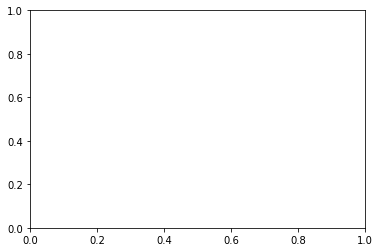

In [27]:
#   CÓDIGO EM CONSTRUÇÃO   

soma_sadc = dados_af_aus.sum()  #somas todos os paises POR ANO que sao da SADC
soma_nao_sadc = dados_af_nao_aus.sum()   #somar todos os paises POR ANO que não sao da SADC
#plotar um gráfico de comparação de PIB (x) por ANO (y) comparando o SADC com o não SADC -- (plotar os 2 no mesmo gráfico e
# usar a função plt.legend com os devidos labels)

plt.plot(transpor_quant, soma_sadc , label="paises da SADC") #erro em como plotar a soma por ano dos paises SADC
plt.plot(transpor_quant, soma_nao_sadc , label="nao SADC") #erro em como plotar a soma por ano dos paises nao SADC
plt.xabel("anos")
plt.ylabel("GDP")
plt.legend()
plt.show()

In [28]:
dados_af_aus1 = africa_anos1.loc[af_aus]
print('PIB total dos países da SADC de 1971 à 1991')
dados_af_aus1.sum().sum() / 14

PIB total dos países da SADC de 1971 à 1991


394528142857.1429

In [29]:
dados_af_aus2 = africa_anos2.loc[af_aus]
print('PIB total dos países da SADC de 1992 à 2012')
dados_af_aus2.sum().sum() / 14

PIB total dos países da SADC de 1992 à 2012


679862857142.8572

In [30]:
print('Diferença por pais entre os intervalos de tempo dos paises da SADC')
(dados_af_aus2.sum().sum() - dados_af_aus1.sum().sum()) / 14
#FAZER EM PORCENTAGEM !!!! (O AUMENTO PERCENTUAL) -- OU FAZER A MÉDIA DE CADA E O AUMENTO PERCENTUAL DA MÉDIA!!!

Diferença por pais entre os intervalos de tempo dos paises da SADC


285334714285.7143

In [31]:
dados_af_nao_aus1 = africa_anos1.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1971 à 1991')
dados_af_nao_aus1.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1971 à 1991


165056629629.62964

In [32]:
dados_af_nao_aus2 = africa_anos2.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1992 à 2012')
dados_af_nao_aus2.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1992 à 2012


328766962962.96295

In [33]:
print('Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC')
(dados_af_nao_aus2.sum().sum() - dados_af_nao_aus1.sum().sum()) / 27

Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC


163710333333.33334

In [34]:
#OBS: O af_nao_aus tem praticamente o dobro de paises que o af_aus! tem que arranjar um jeito de ser proporcional!
# --- fazer a média? (é eficiente?  / o melhor jeito?)

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados